# Download Data

### Use Google Drive to store the weights from Mask RCNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Remove any previous contents in the colab directory

In [ ]:
rm -rf json/ labels/ images/ dataset.zip sample_data

### Download the image annotations from DeepGIS.

You can generate dataset by clicking the Deep Learning Zoo/Mask RCNN option (left side) of DeepGIS. 

Example shown here is that of LROC NAC image dataset, you can replace the dataset.zip with your annotations in DeepGIS

In [ ]:
! wget https://lroc-nac.deepgis.org/media/labels/ethan_new_account/oabrScFABSbGmIDE/dataset.zip

--2020-11-08 19:05:58--  https://lroc-nac.deepgis.org/media/labels/ethan_new_account/oabrScFABSbGmIDE/dataset.zip
Resolving lroc-nac.deepgis.org (lroc-nac.deepgis.org)... 129.219.113.11
Connecting to lroc-nac.deepgis.org (lroc-nac.deepgis.org)|129.219.113.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 816974 (798K) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>] 797.83K  2.20MB/s    in 0.4s    

2020-11-08 19:05:59 (2.20 MB/s) - ‘dataset.zip’ saved [816974/816974]



In [ ]:
! unzip dataset.zip -qq

Archive:  dataset.zip
   creating: images/
   creating: json/
  inflating: json/tile_0_25900_0_0.json  
  inflating: json/tile_0_17150_0_0.json  
  inflating: json/tile_0_13300_0_0.json  
  inflating: json/tile_0_31150_0_0.json  
  inflating: json/tile_0_28000_0_0.json  
  inflating: json/tile_0_11200_0_0.json  
  inflating: json/tile_0_19950_0_0.json  
  inflating: json/tile_0_18550_0_0.json  
  inflating: json/tile_0_0_0_0.json  
  inflating: json/tile_0_700_0_0.json  
  inflating: json/tile_0_16450_0_0.json  
  inflating: json/tile_0_7350_0_0.json  
  inflating: json/tile_0_10500_0_0.json  
  inflating: json/tile_0_29050_0_0.json  
  inflating: json/tile_0_7000_0_0.json  
  inflating: json/tile_0_32200_0_0.json  
  inflating: images/tile_0_13300_0_0.png  
  inflating: images/tile_0_10500_0_0.png  
  inflating: images/tile_0_7350_0_0.png  
  inflating: images/tile_0_0_0_0.png  
  inflating: images/tile_0_700_0_0.png  
  inflating: images/tile_0_17150_0_0.png  
  inflating: images/til

# Import libraries

### Download Utils code

In [ ]:
! wget https://download.openuas.us/drive-download-20200923T063621Z-001.zip

--2020-11-08 19:05:59--  https://download.openuas.us/drive-download-20200923T063621Z-001.zip
Resolving download.openuas.us (download.openuas.us)... 129.219.113.11
Connecting to download.openuas.us (download.openuas.us)|129.219.113.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28930 (28K) [application/zip]
Saving to: ‘drive-download-20200923T063621Z-001.zip’

drive-download-2020 100%[===================>]  28.25K  --.-KB/s    in 0s      

2020-11-08 19:06:00 (274 MB/s) - ‘drive-download-20200923T063621Z-001.zip’ saved [28930/28930]



In [ ]:
! unzip drive-download-20200923T063621Z-001.zip

Archive:  drive-download-20200923T063621Z-001.zip
   creating: drive-download-20200923T063621Z-001/
  inflating: drive-download-20200923T063621Z-001/coco_utils.py  
  inflating: drive-download-20200923T063621Z-001/crater_train.py  
  inflating: drive-download-20200923T063621Z-001/crater_infer.py  
  inflating: drive-download-20200923T063621Z-001/crater.py  
  inflating: drive-download-20200923T063621Z-001/utils.py  
  inflating: drive-download-20200923T063621Z-001/visualize.py  
  inflating: drive-download-20200923T063621Z-001/engine.py  
  inflating: drive-download-20200923T063621Z-001/model.py  
  inflating: drive-download-20200923T063621Z-001/coco_utils.pyc  
  inflating: drive-download-20200923T063621Z-001/coco_eval.py  
  inflating: drive-download-20200923T063621Z-001/transforms.py  


In [ ]:
! mv drive-download-20200923T063621Z-001/*.py .

### Convert json to numpy masks

In [ ]:
! pip install wand
! apt-get install libmagickwand-dev -y

     |████████████████████████████████| 143kB 9.5MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gir1.2-freedesktop
  gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 gsfonts imagemagick-6-common
  libcairo-script-interpreter2 libcairo2-dev libcupsfilters1 libcupsimage2
  libdjvulibre-dev libdjvulibre-text libdjvulibre21 libgdk-pixbuf2.0-dev
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 liblcms2-dev liblqr-1-0
  liblqr-1-0-dev libmagickcore-6-arch-config libmagickcore-6-headers
  libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra libmagickcore-6.q16-dev
  libmagickwand-6-headers libmagickwand-6.q16-3 libmagickwand-6.q16-dev
  libpixman-1-dev librsvg2-dev libwmf-dev libwmf0.2-7 libxcb-shm0-dev
  poppler-data
Suggested packages:
  fonts-noto ghostscript-x libcairo2-doc inkscape libjxr-tools librsvg2-doc
  libwmf-doc libwmf0.2-7-gtk poppler-uti

In [ ]:
import os
import json
import re
import numpy as np
from wand.image import Image as WandImage
from wand.color import Color as WandColor
import io
import imageio
from bs4 import BeautifulSoup

In [ ]:
def image_string_to_SVG_string_file(svgStr):
    SVG_string_file = io.StringIO(svgStr)
    SVG_string_file.seek(0)
    return SVG_string_file.read().encode('utf-8')

def image_label_string_to_SVG_string(DBStr, height=None, width=None, x=0, y=0, keepImage=False):
    addedStr = DBStr
    #get the image path
    imagePath = ""
    imageString = ""
    if keepImage:
        imagePath = re.search('ns1:href="(.*)png"', DBStr)
        try:
            imagePath = imagePath.group(1)+"png"
        except AttributeError as e:
            imagePath = re.search('a0:href="(.*)png"', DBStr)
            imagePath = imagePath.group(1) + "png"

        imageWidth = re.search(r'width="(\d+)"', addedStr).group(1)
        imageHeight = re.search(r'height="(\d+)"', addedStr).group(1)

        imageString = '<defs><pattern id="backgroundImage" ' \
        'patternUnits="userSpaceOnUse" width="%s" height="%s">' \
        '<image xlink:href="%s" x="-%s" y="-%s" width="%s" height="%s"/>' \
        '</pattern></defs><rect id="background" fill="url(#backgroundImage)" '\
        'width="%s" height="%s"/>' % (width, height, imagePath, x, y, imageWidth, imageHeight, width, height)

    if height == None or width == None:
        image, height, width = SVGDimensions(DBStr)
        if not keepImage and image:
            addedStr = DBStr.replace(image, '')

    addedStr = re.sub(r'<image.+hidden"/>', '', addedStr)
    addedStr = addedStr.encode('utf-8')
    return '<?xml version="1.0" encoding="UTF-8" standalone="no"?>' \
           '<svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg"' \
           ' xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px" xml:space="preserve" height="%s"' \
           ' width="%s">%s%s</svg>' % (height, width, imageString, addedStr)


In [ ]:
! rm -rf labels

In [ ]:
IMAGE_FILE_EXTENSION = ".png"

json_files = os.listdir('json/')

if not os.path.exists('labels/'):
    os.makedirs('labels/')

# IMPORTANT: Specify the category name
# Example
# non-crater = 0
# crater = 1
CATEGORY_NAME = "crater"

for json_file in json_files:
  with open('json/' + json_file) as f:
    data = json.load(f)
  
  outputFilenameNpy = 'labels/' + json_file[:-4] + 'npy'
  height = data["height"]
  width = data["width"]
  ctr = 0
  total_paths = 500
  masks_ndarray = np.zeros((total_paths, height, width), dtype=np.int8)
  for id, element in data["labelShapes"]:
    # Only label in CATEGORY_NAME is considered
    if data["categories"][id] != CATEGORY_NAME:
      continue

    category_id = 1
    svg = element

    paths = []
    poly = []
    soup = BeautifulSoup(svg)
    circles = soup.find_all('circle')
    poly = soup.find_all('polygon')
    paths = soup.find_all('path')
    ellipse = soup.find_all('ellipse')
    shapes = paths + poly + circles + ellipse
    print(len(shapes))

    if len(paths) + len(poly) + len(circles) + len(ellipse) > 0:
      for idx,path in enumerate(shapes):
        img=WandImage(blob=image_string_to_SVG_string_file(image_label_string_to_SVG_string(str(path),height,width)))
        img.resize(width, height)
        img.background_color = WandColor('white')
        img.alpha_channel = 'remove'
        img.negate()
        img.threshold(0)
        img.format = 'png'

        outputFilename = ('labels/' + json_file[:-4] + 'png')

        img.save(filename=outputFilename)
        im = imageio.imread(outputFilename)

        masks = np.array(im)
        cat_mask = np.where(masks == 255, category_id , masks)

        if cat_mask.max() != 0:
          cat_mask_check = cat_mask > 0
          cat_mask_check = cat_mask_check.astype(np.uint8)
          pos = np.where(cat_mask_check)
          xmin = np.min(pos[1])
          xmax = np.max(pos[1])
          ymin = np.min(pos[0])
          ymax = np.max(pos[0])
          if xmin < xmax and ymin < ymax:
            masks_ndarray[ctr, :, :] = cat_mask
            ctr = ctr + 1
            # print(ctr)
            
  print(outputFilenameNpy)
  masks_ndarray.resize(ctr, height, width)
  masks_ndarray = masks_ndarray.transpose(1, 2, 0)
  np.save(outputFilenameNpy, masks_ndarray)

  for rmfile in os.listdir('labels/'):
      if rmfile.endswith('.png'):
          os.remove('labels/' + rmfile)    

270
labels/tile_0_29050_0_0.npy
103
labels/tile_0_16450_0_0.npy
82
labels/tile_0_11200_0_0.npy
151
labels/tile_0_18550_0_0.npy
1
labels/tile_0_19950_0_0.npy
242
labels/tile_0_25900_0_0.npy
54
labels/tile_0_10500_0_0.npy
220
labels/tile_0_13300_0_0.npy
61
labels/tile_0_7000_0_0.npy
86
labels/tile_0_17150_0_0.npy
54
labels/tile_0_7350_0_0.npy
359
labels/tile_0_31150_0_0.npy
65
labels/tile_0_28000_0_0.npy
171
labels/tile_0_700_0_0.npy
194
labels/tile_0_32200_0_0.npy
162
labels/tile_0_0_0_0.npy


### Display Annotations on one of the images

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


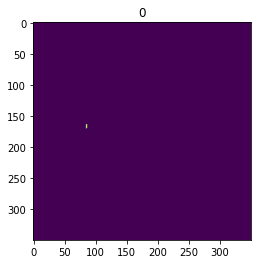

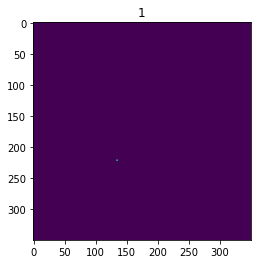

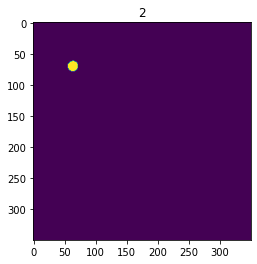

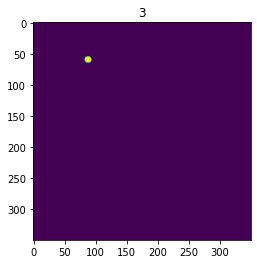

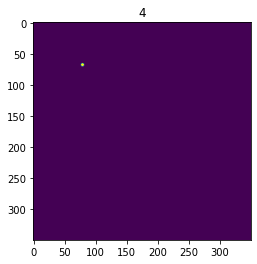

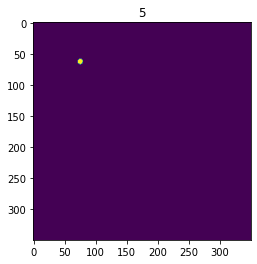

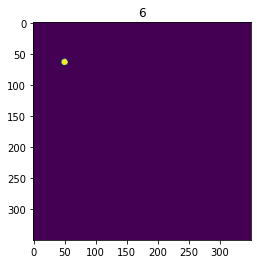

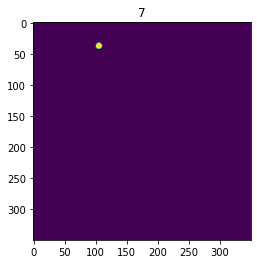

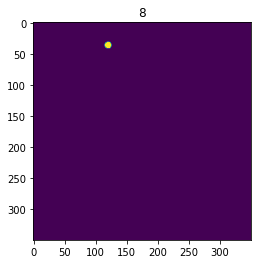

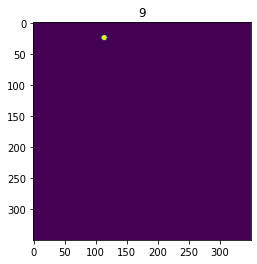

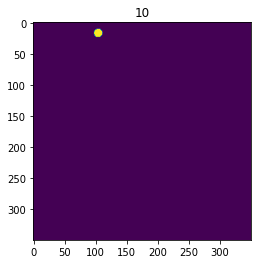

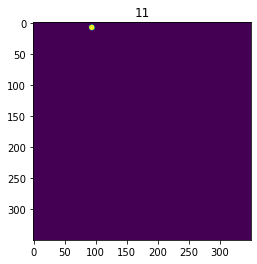

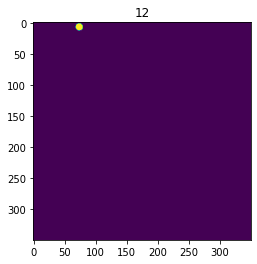

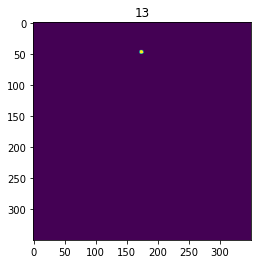

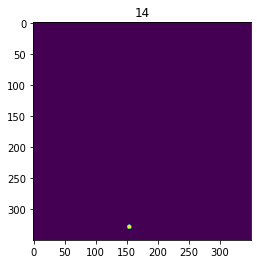

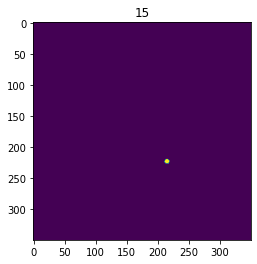

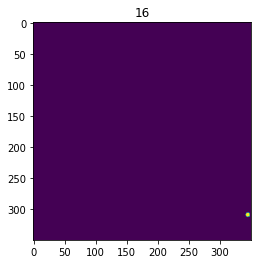

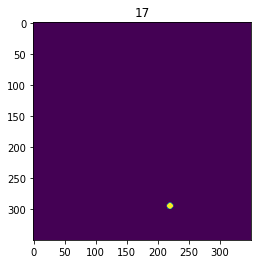

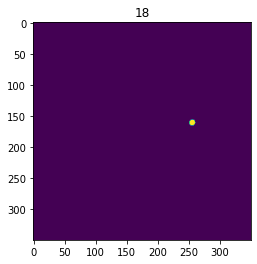

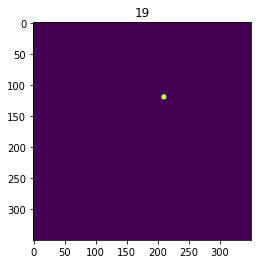

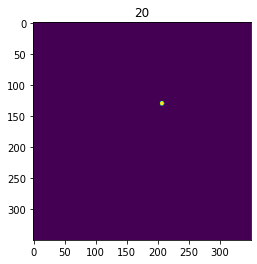

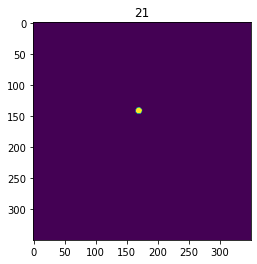

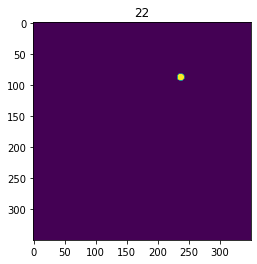

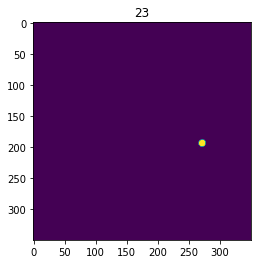

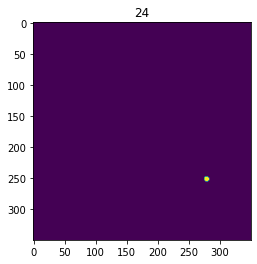

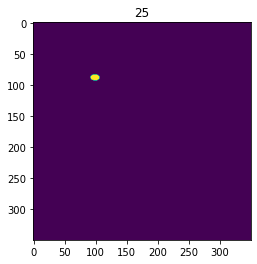

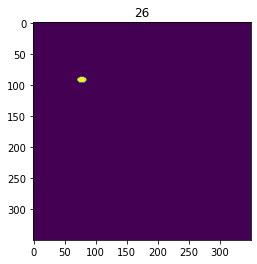

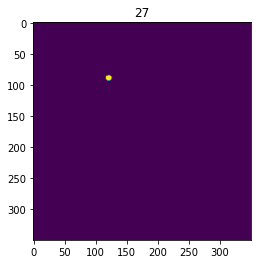

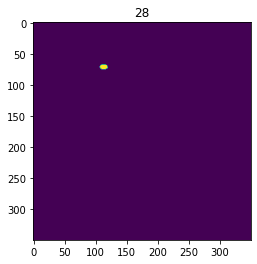

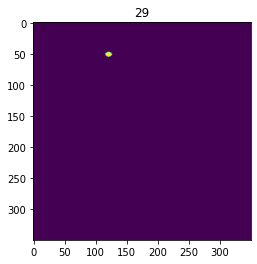

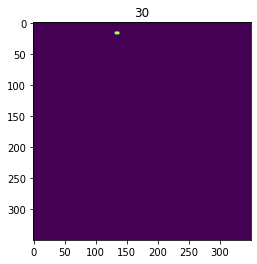

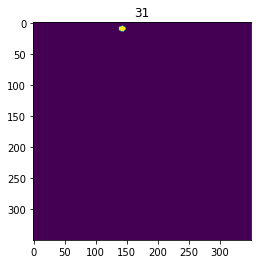

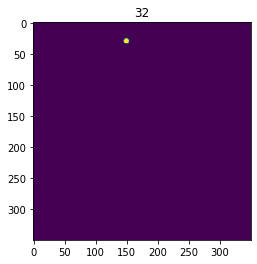

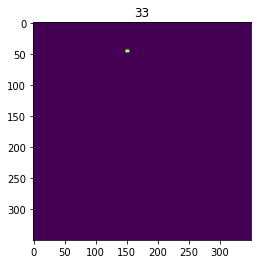

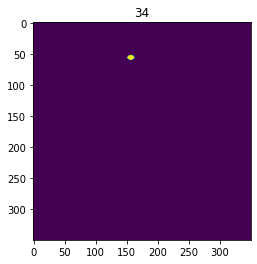

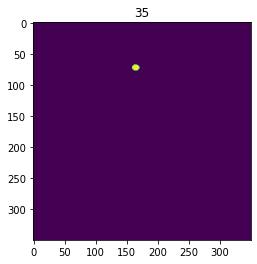

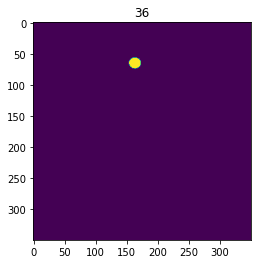

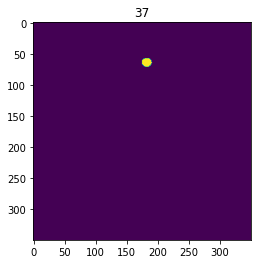

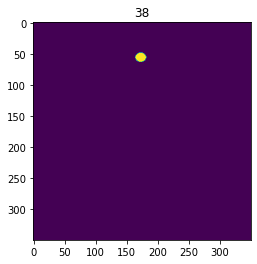

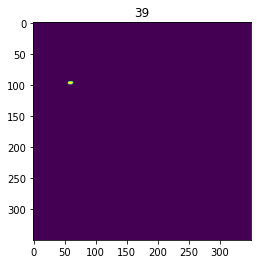

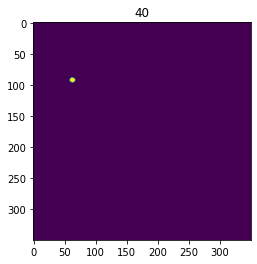

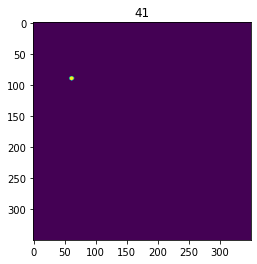

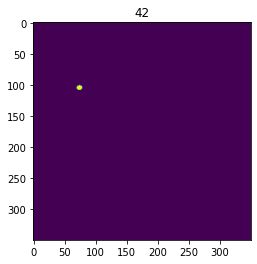

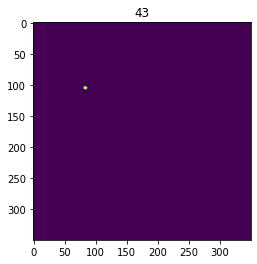

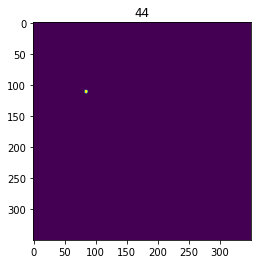

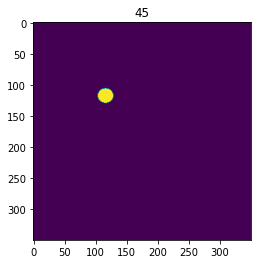

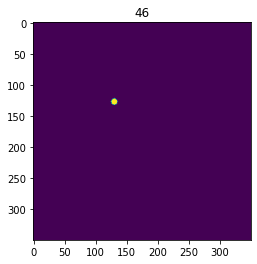

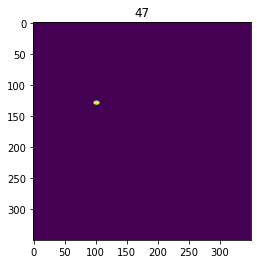

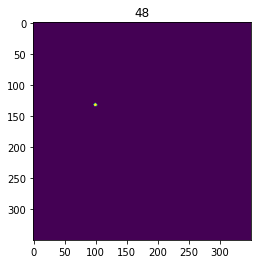

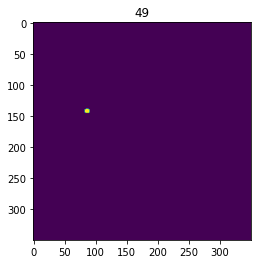

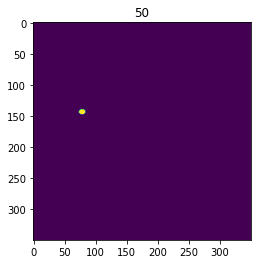

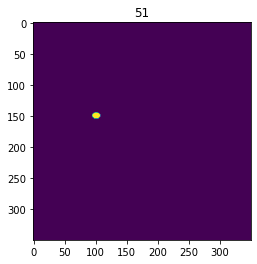

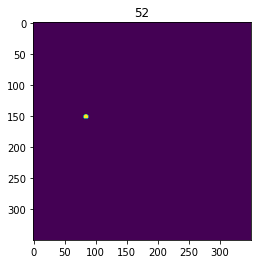

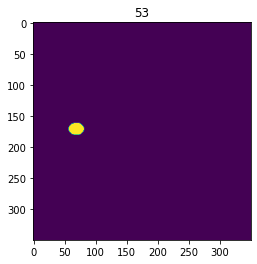

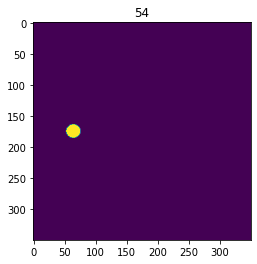

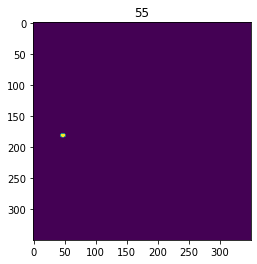

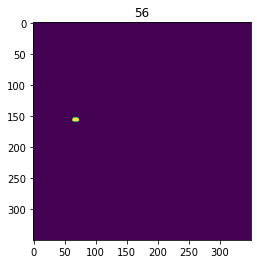

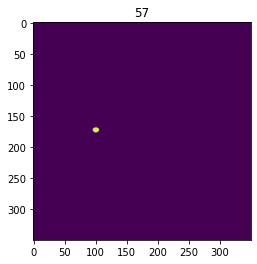

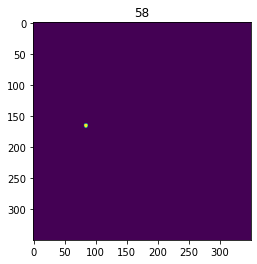

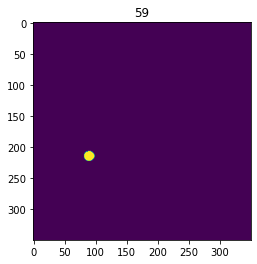

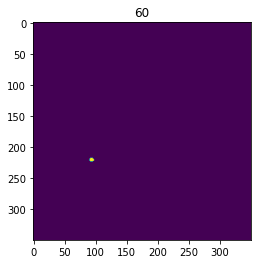

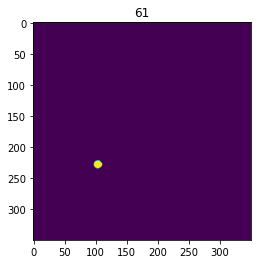

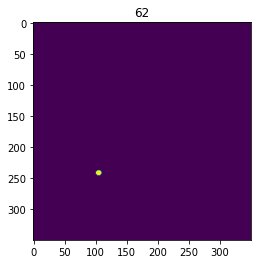

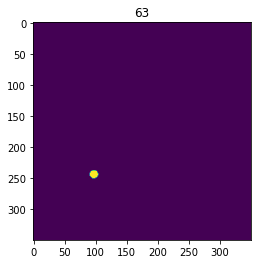

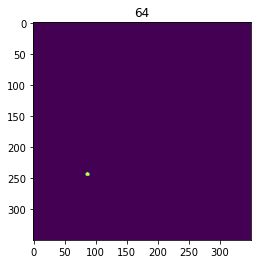

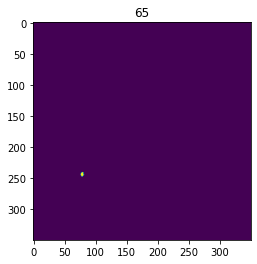

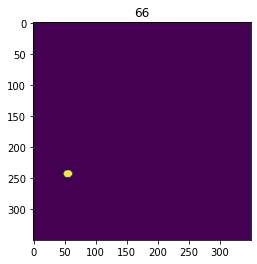

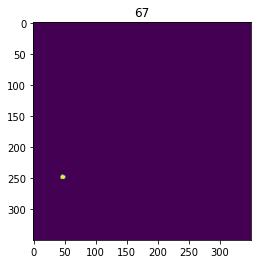

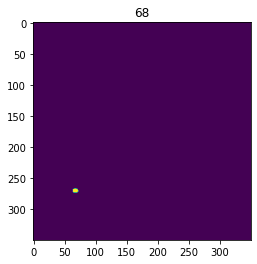

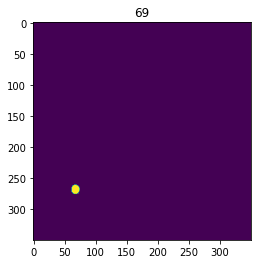

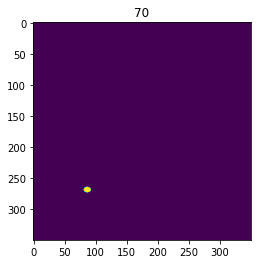

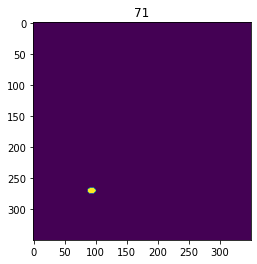

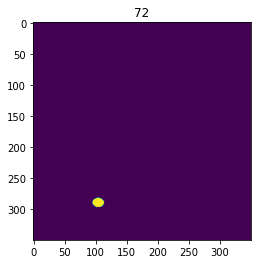

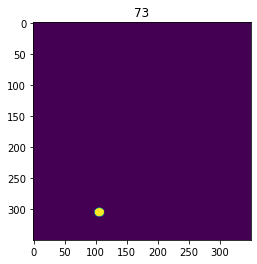

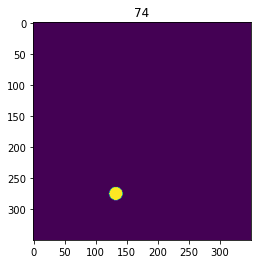

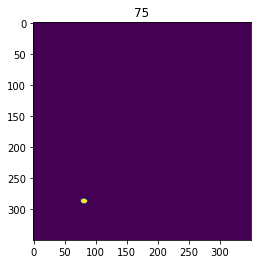

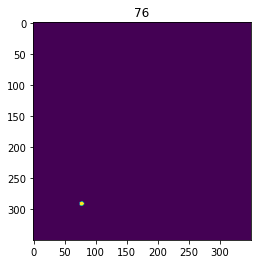

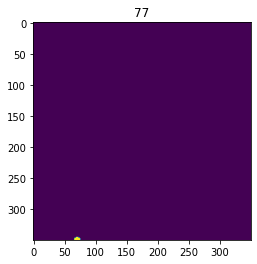

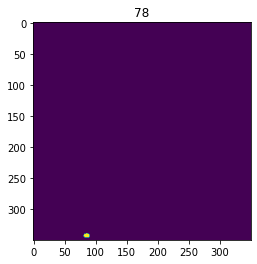

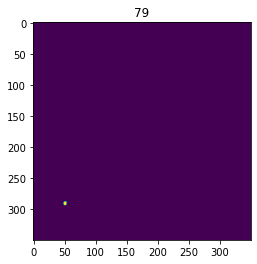

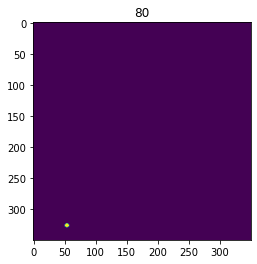

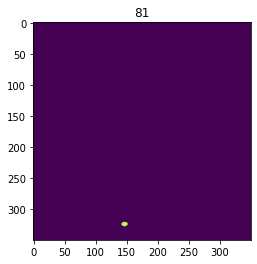

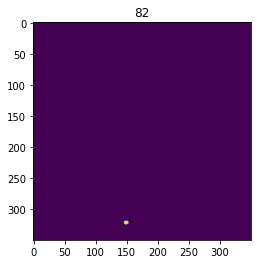

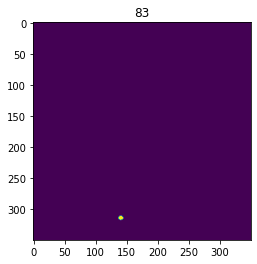

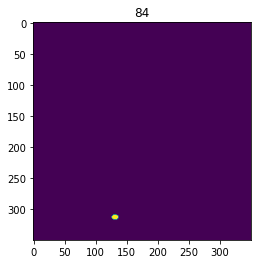

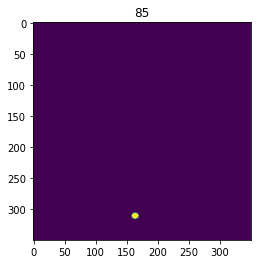

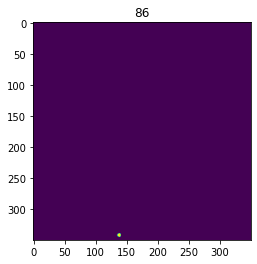

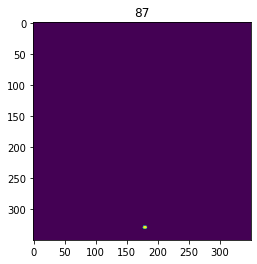

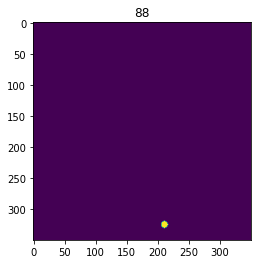

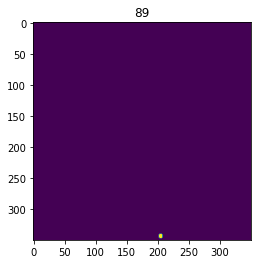

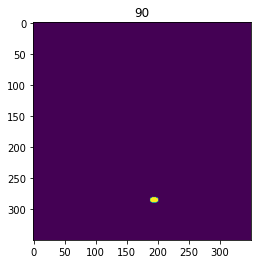

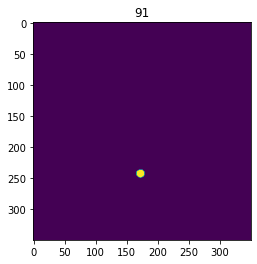

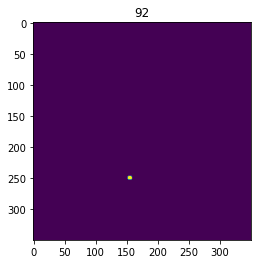

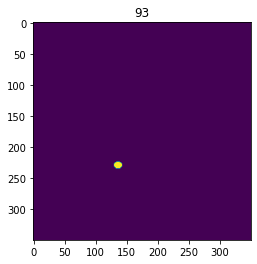

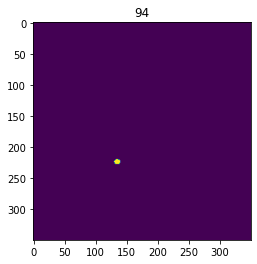

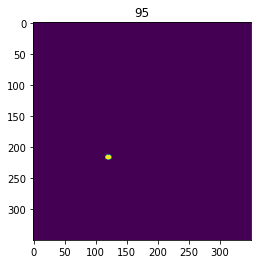

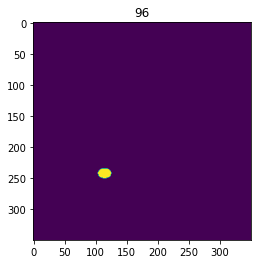

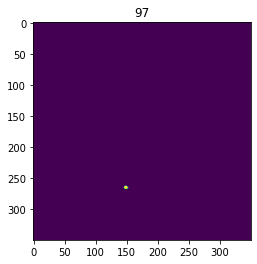

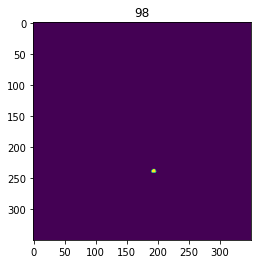

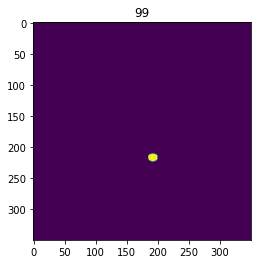

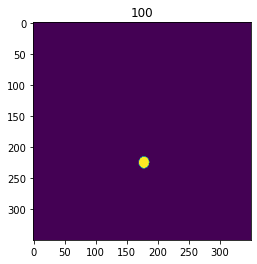

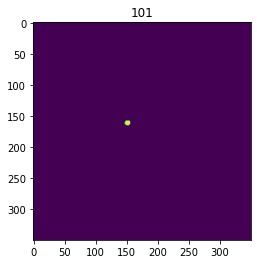

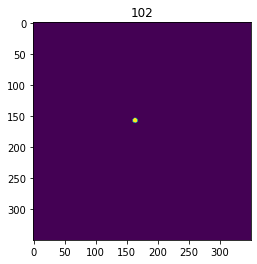

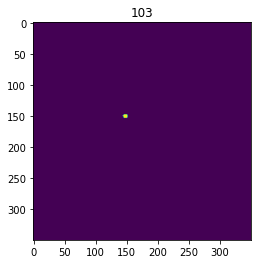

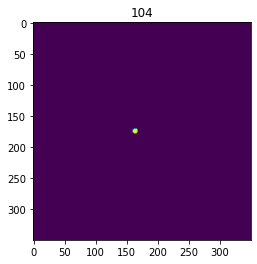

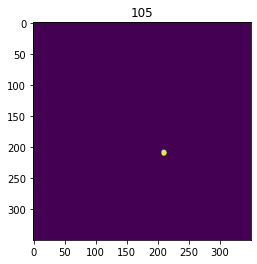

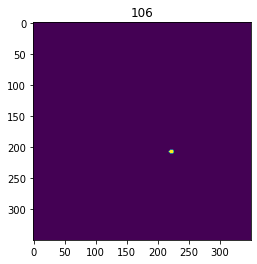

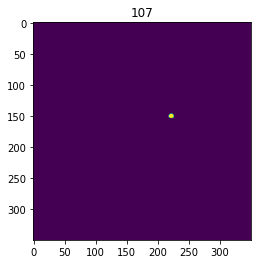

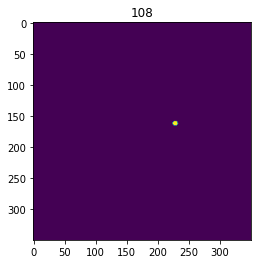

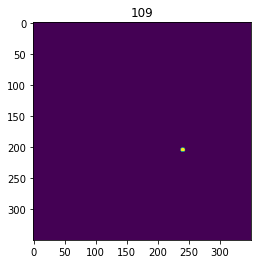

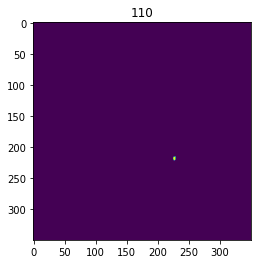

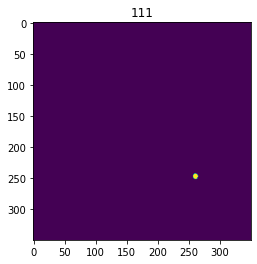

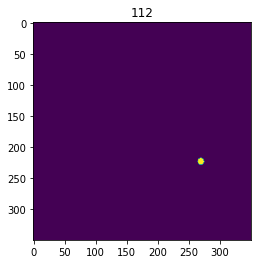

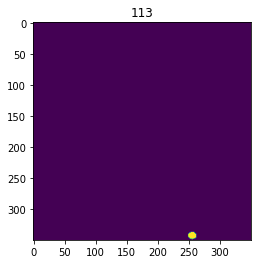

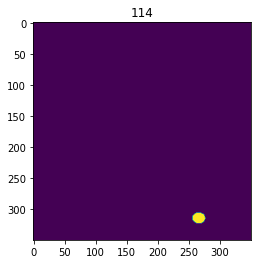

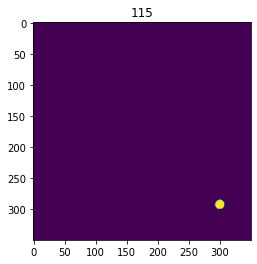

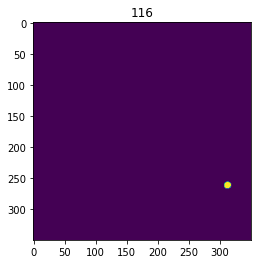

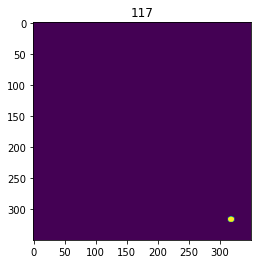

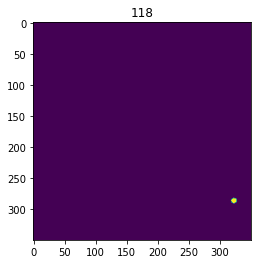

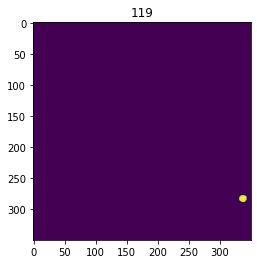

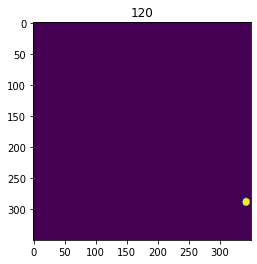

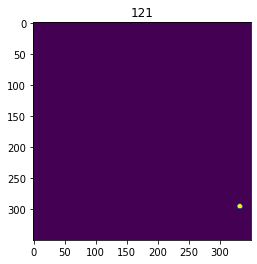

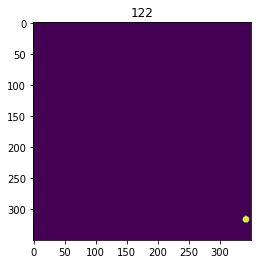

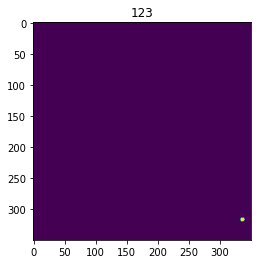

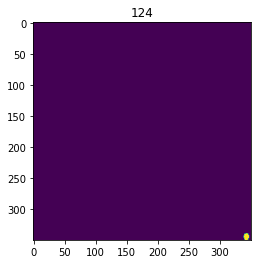

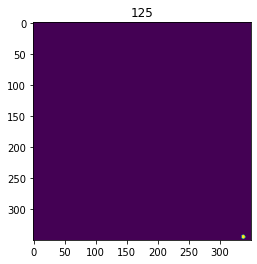

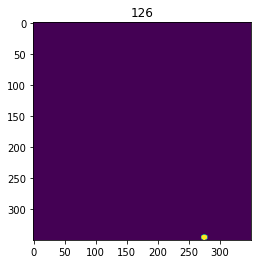

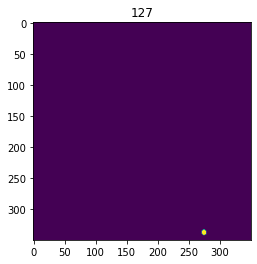

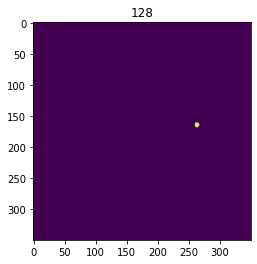

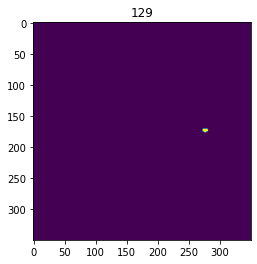

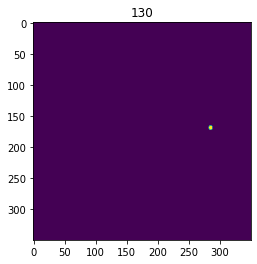

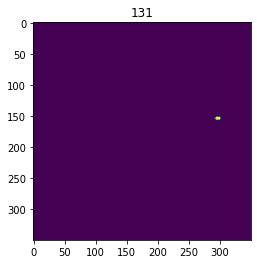

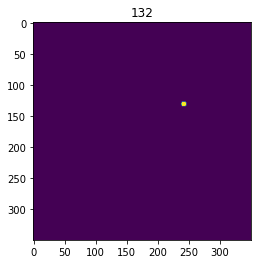

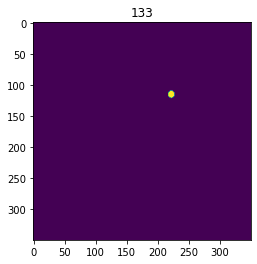

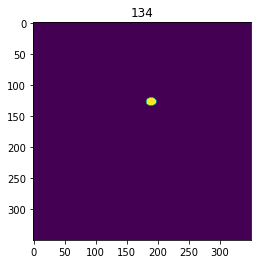

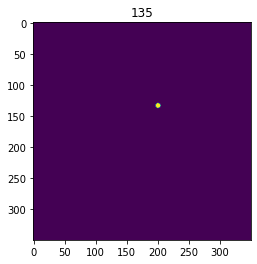

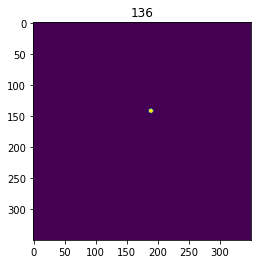

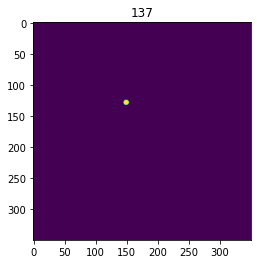

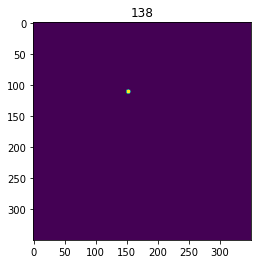

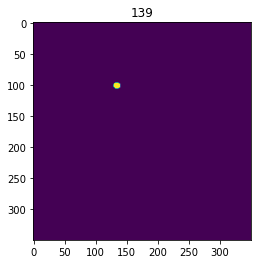

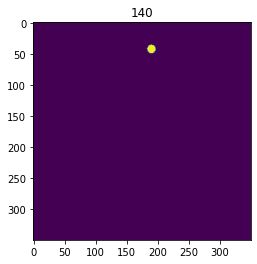

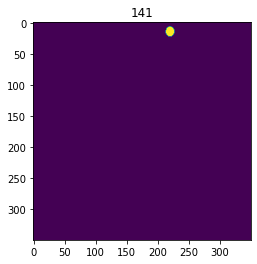

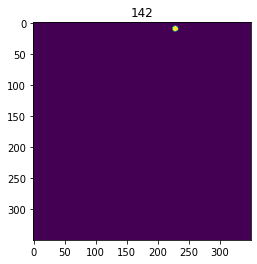

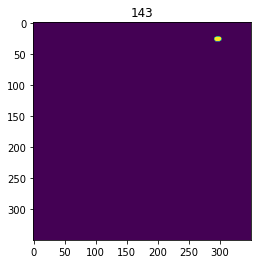

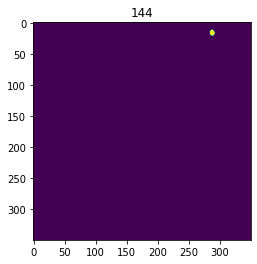

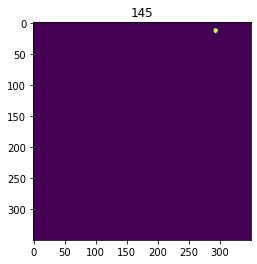

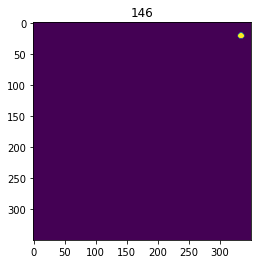

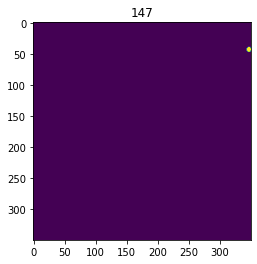

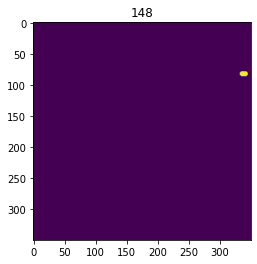

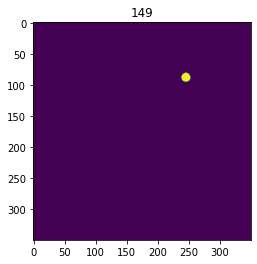

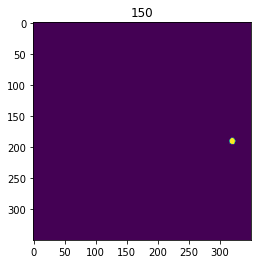

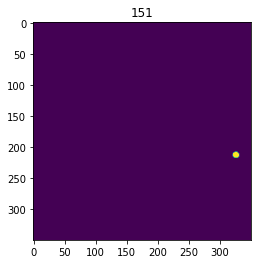

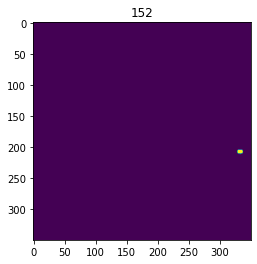

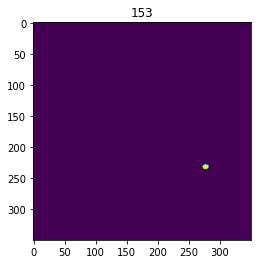

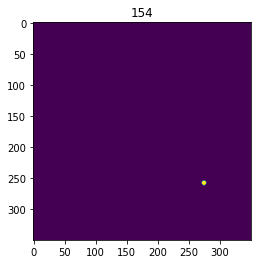

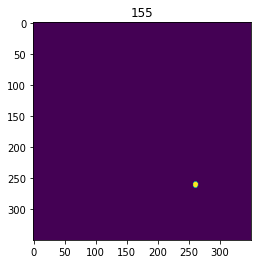

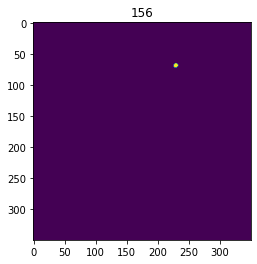

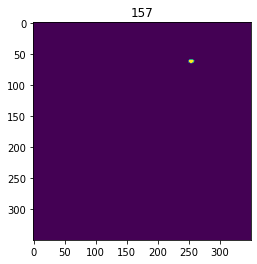

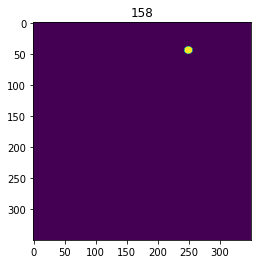

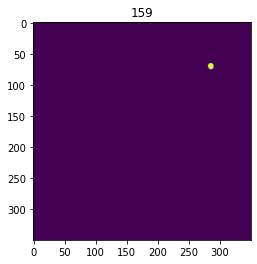

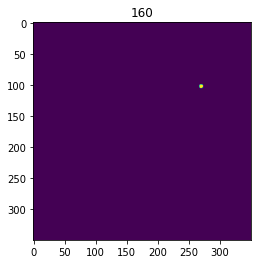

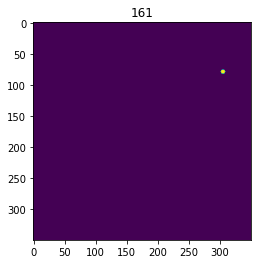

In [ ]:
a = np.load('labels/tile_0_0_0_0.npy')  # Select a numpy mask file from the labels folder
# image = a[:, :,19]
# plt.imshow(image)
for i in range(a.shape[2]):
  plt.figure()
  plt.imshow(a[:, :,i])
  plt.title(str(i))

#plt.imsave('name.png', image)

(350, 350, 162)


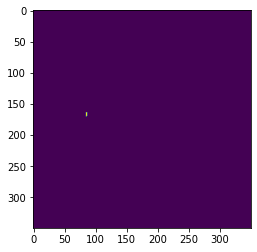

In [ ]:
a = np.load('labels/tile_0_0_0_0.npy')
print(a.shape)
image = a[:, :, 0]
plt.imshow(image)
plt.imsave('name.png', image)

### Overlay one of the image annotation on top of the image to validate the annotations

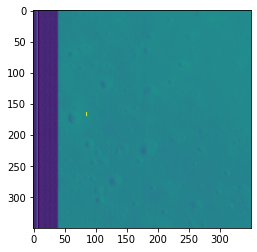

In [ ]:
img = Image.open("name.png")
background = Image.open("images/tile_0_0_0_0.png")
background.paste(img, (0, 0), background)
background.save('superimpose.png',"PNG")
img = mpimg.imread('superimpose.png')
imgplot = plt.imshow(img)

### Import libraries

In [ ]:
import transforms as T
from engine import train_one_epoch, evaluate
import utils
import torch
from crater import Dataset
from model import get_model_instance_segmentation
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Define utils

In [ ]:
class ToTensor(object):
    def __call__(self, image, target):
        # image = F.to_tensor(image).float()
        image = np.array(image)
        image = torch.from_numpy(image / 255.0).float()
        image = image.permute((2, 0, 1))
        return image, target

def get_transform(train):
    transforms = []
    transforms.append(ToTensor()) # torchvision.transforms.functional is a garbage, sorry guys
    return T.Compose(transforms)

def get_mean_std(input_channel, image_mean, image_std):
    if input_channel == 8:
        return image_mean, image_std
    elif input_channel == 3:
        return image_mean[:3], image_std[:3]
    elif input_channel == 5:
        return image_mean[:5], image_std[:5]
    elif input_channel == 6:
        return image_mean[:3] + image_mean[-3:], image_std[:3] + image_mean[-3:]
    elif input_channel == 4:
        return image_mean[:3] + [np.mean(image_mean[-3:]).tolist()], image_std[:3] + [np.mean(image_std[-3:]).tolist()]
    elif input_channel == 'dem':
        return image_mean[-3:], image_std[-3:]

# Train Network

### Load device

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)  # make sure you have cuda for training


cuda


### Load data

In [ ]:
from shutil import copyfile
files = os.listdir('./labels/')
for i in range(5):
  for f in files:
      copyfile('./labels/'+f, './labels/'+str(i)+"_"+f)

files = os.listdir('./images/')
for i in range(5):
  for f in files:
      copyfile('./images/'+f, './images/'+str(i)+"_"+f)

In [ ]:
num_classes = 2
# use our dataset and defined transformations
dataset = Dataset("./images/", "./labels/", transforms=get_transform(train=True), readsave=False, include_name=False)
dataset_test = Dataset("./images/", "./labels/", transforms=get_transform(train=False), readsave=False, savePickle=False, include_name=False)
image_mean, image_std, _, _ = dataset.imageStat()  # get mean and std if you don't know
print(image_mean)
print(image_std)
# image_mean = [0.41231242875824203, 0.5130761167746336, 0.4029222483664792]
# image_std = [0.13621299516791718, 0.1440259649444564, 0.1147946217819145]


# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=4, shuffle=True, num_workers=8,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn)


[0.34616187074865956, 0.34616187074865956, 0.34616187074865956]
[0.10754412766560431, 0.10754412766560431, 0.10754412766560431]


# Train network

### Create a directory inside Google Drive to save the checkpoints

In [ ]:
!mkdir /content/drive/My\ Drive/trained_param_crater_lroc_nac_v1

### Train Mask RCNN

In [ ]:
# get the model using our helper function
mask_rcnn = get_model_instance_segmentation(num_classes, image_mean, image_std, stats=True)

read_param = True
if read_param:
    mask_rcnn.load_state_dict(torch.load("/content/drive/My Drive/trained_param_crater_lroc_nac_v1/epoch_0097.param"))
    print("Loaded weights")

# move model to the right device
mask_rcnn.to(device)

# construct an optimizer
params = [p for p in mask_rcnn.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                                step_size=5,
                                                gamma=0.1)
init_epoch = 100
num_epochs = 500

#'''
for epoch in range(init_epoch, init_epoch + num_epochs):
    save_param = "/content/drive/My Drive/trained_param_crater_lroc_nac_v1/epoch_{:04d}.param".format(epoch)
    torch.save(mask_rcnn.state_dict(), save_param)
    # train for one epoch, printing every 10 iterations
    train_one_epoch(mask_rcnn, optimizer, data_loader, device, epoch, print_freq=100)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    #print('\n')
    print(save_param)
    #mask_rcnn.load_state_dict(torch.load("trained_param_4/epoch_00%02d.param" % epoch))
    #if (epoch+1) % 5 == 0:
    #evaluate(mask_rcnn, data_loader_test, device=device)
    #save_param = "trained_param_8_fresh/epoch_{:04d}.param".format(epoch)
    torch.save(mask_rcnn.state_dict(), save_param)

### Inference

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)  # check your device

cuda


In [ ]:
num_classes = 2
# use our dataset and defined transformations
#dataset = Dataset("./images/", "./labels/", transforms=get_transform(train=True), readsave=False, include_name=False)
dataset_test = Dataset("./images/", "./labels/", transforms=get_transform(train=False), readsave=False, savePickle=False, include_name=True)
image_mean, image_std, _, _ = dataset.imageStat()  # get mean and std if you don't know
print(image_mean)
print(image_std)
# image_mean = [0.41231242875824203, 0.5130761167746336, 0.4029222483664792]
# image_std = [0.13621299516791718, 0.1440259649444564, 0.1147946217819145]

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn)


[0.34616187074865956, 0.34616187074865956, 0.34616187074865956]
[0.10754412766560431, 0.10754412766560431, 0.10754412766560431]


In [ ]:
# assert model path
model_path = "/content/drive/My Drive/trained_param_crater_lroc_nac_v1/epoch_0551.param"  # this should be the path where you save your training model
assert os.path.exists(model_path)

from model import visualize_result
from model import visualize_pred

In [ ]:
mask_rcnn = get_model_instance_segmentation(num_classes, image_mean, image_std, stats=True)
mask_rcnn.to(device)
mask_rcnn.eval()
mask_rcnn.load_state_dict(torch.load(model_path))

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


<All keys matched successfully>

In [ ]:
from model import visualize_result
a = np.load('/content/labels/tile_0_700_0_0.npy')
a.shape

(350, 350, 171)

torch.Size([3, 350, 350])
./images/4_tile_0_700_0_0.png


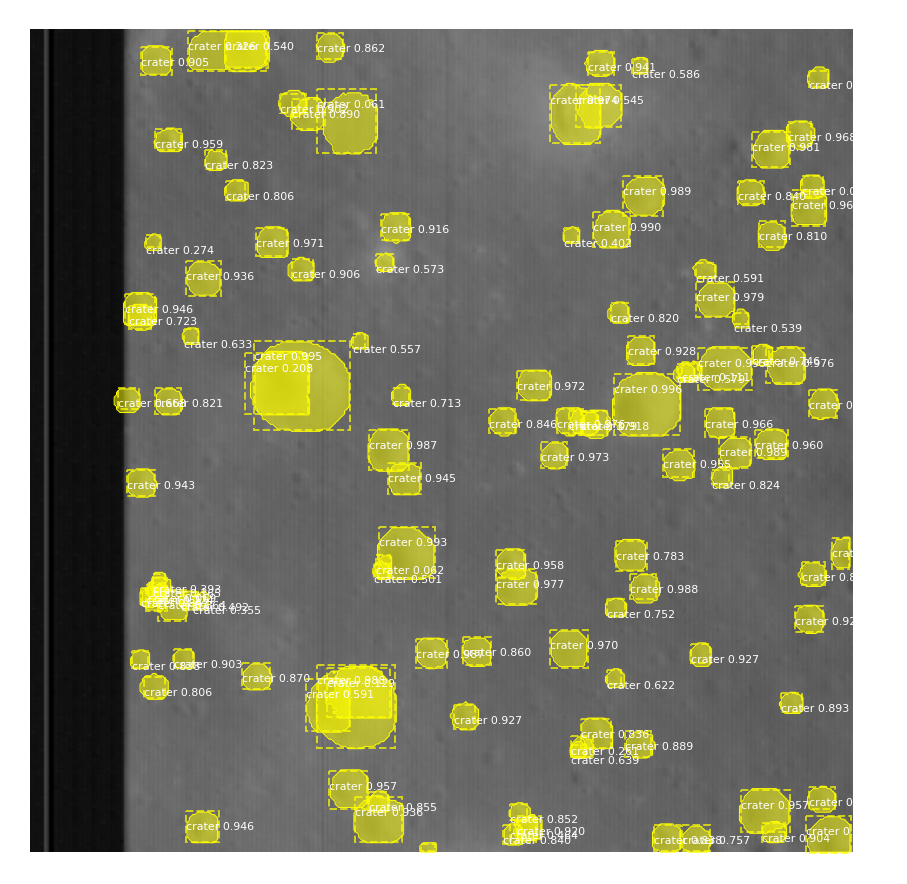

In [ ]:
for i, data in enumerate(dataset_test):
    #print(i)
    image, target = data
    print(image.shape)
    pred = mask_rcnn(image.unsqueeze(0).to(device))[0]

    boxes = pred['boxes'].to("cpu").detach().numpy()
    labels = pred['labels'].to("cpu").detach().numpy()
    scores = pred['scores'].to("cpu").detach().numpy()
    masks = pred['masks'].to("cpu").detach().numpy()  # the predictions, numpy ndarray
    image_name = target['image_name']

    result = {}
    result['bb'] = boxes
    result['labels'] = labels
    result['scores'] = scores
    result['mask'] = masks
    result['image_name'] = image_name
    print(image_name)
    # visualize_gt(image, target)
    # visualize_result(mask_rcnn, data)
    visualize_pred(image, pred)
    break


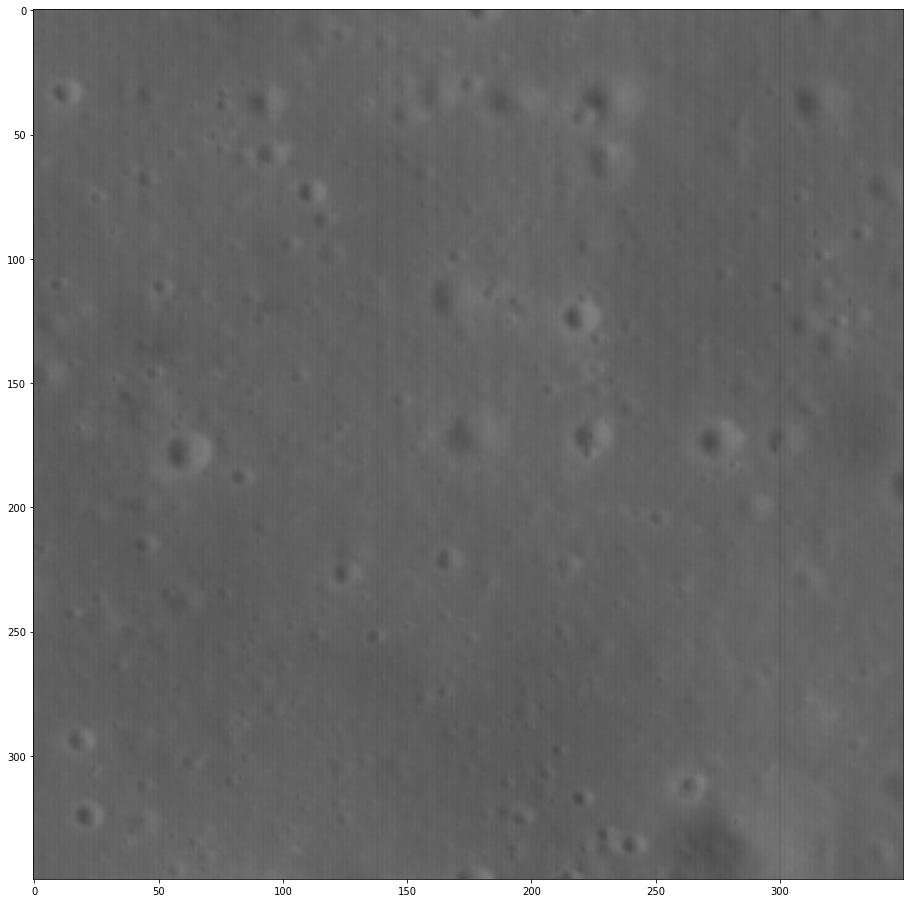

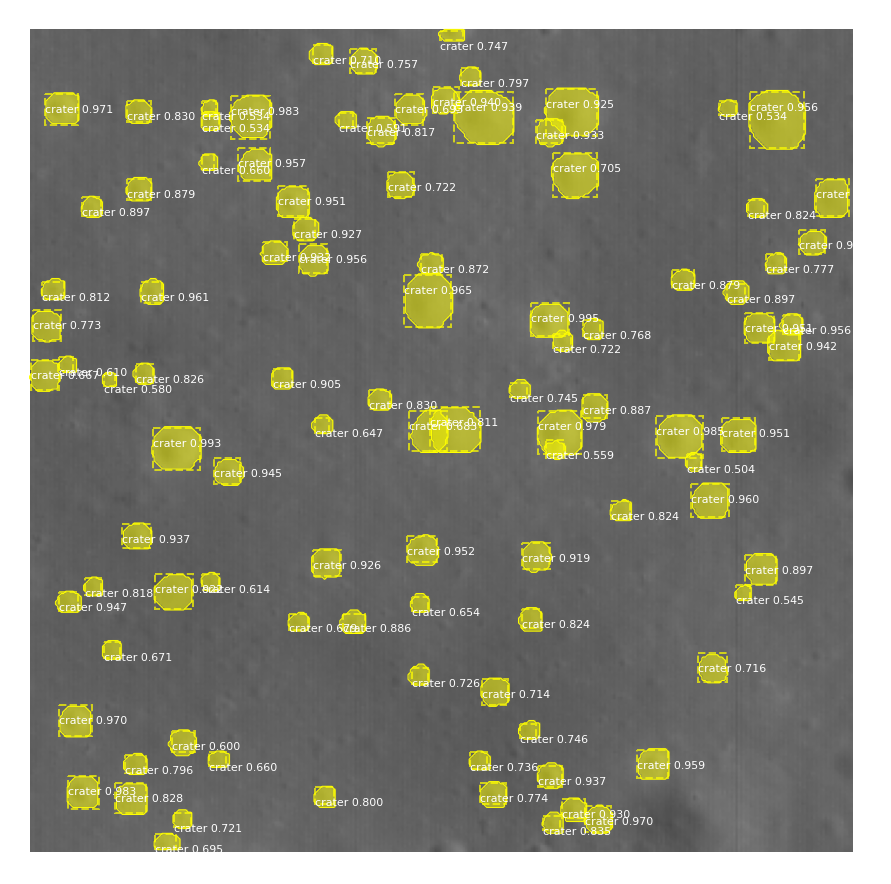

array([[[100, 100, 100],
        [100, 100, 100],
        [ 97,  97,  97],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [101, 101, 101]],

       [[101, 101, 101],
        [100, 100, 100],
        [ 96,  96,  96],
        ...,
        [101, 101, 101],
        [ 97,  97,  97],
        [104, 104, 104]],

       [[101, 101, 101],
        [101, 101, 101],
        [ 96,  96,  96],
        ...,
        [100, 100, 100],
        [ 96,  96,  96],
        [ 98,  98,  98]],

       ...,

       [[ 99,  99,  99],
        [101, 101, 101],
        [ 95,  95,  95],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [102, 102, 102]],

       [[ 99,  99,  99],
        [101, 101, 101],
        [ 96,  96,  96],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [101, 101, 101]],

       [[ 98,  98,  98],
        [101, 101, 101],
        [ 96,  96,  96],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 99,  99,  99]]

In [ ]:
from PIL import Image
from visualize import display_instances


img_path = '/content/tile_4200_46200.png'
image = Image.open(img_path).convert("RGB")

image = np.array(image)

_, ax = plt.subplots(1, figsize=(16,16))
ax.imshow(image.astype(np.uint8))

image = torch.from_numpy(image / 255.0).float()
image = image.permute((2, 0, 1))





pred = mask_rcnn(image.unsqueeze(0).to(device))[0]
boxes = pred['boxes'].to("cpu").detach().numpy()
labels = pred['labels'].to("cpu").detach().numpy()
scores = pred['scores'].to("cpu").detach().numpy()
masks = pred['masks'].to("cpu").detach().numpy()  # the predictions, numpy ndarray
image_name = target['image_name']


boxes_ = pred["boxes"].cpu().detach().numpy().astype(int)
boxes = np.empty_like(boxes_)
boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3] = boxes_[:, 1], boxes_[:, 0], boxes_[:, 3], boxes_[:, 2]
labels = pred["labels"].cpu().detach().numpy()
scores = pred["scores"].cpu().detach().numpy()
masks = pred["masks"]
indices = scores > 0.5
boxes = boxes[indices]
labels = labels[indices]
scores = scores[indices]
masks = masks[indices].squeeze(1)
masks = (masks.permute((1, 2, 0)).cpu().detach().numpy() > 0.5).astype(np.uint8)
image = image.permute((1, 2, 0)).cpu().detach().numpy()*255
display_instances(image, boxes, masks, labels, class_names=["background", "crater"], scores=scores)


In [ ]:
! sudo add-apt-repository ppa:ubuntugis/ppa -y && apt-get update
! sudo apt-get install gdal-bin libgdal-dev
! export CPLUS_INCLUDE_PATH=/usr/include/gdal
! export C_INCLUDE_PATH=/usr/include/gdal
! pip install GDAL rasterio

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [1,750 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,354 kB]
Get:12 https://cloud.r-project